# Analyses post scrapping

In [1]:
import pandas as pd
import pickle

In [9]:
df = pickle.load(open('tous_les_logements.p', 'rb'))
print(df.shape)
df.tail(2)

(127, 12)


,date_enregistrement,texte,type,ville,description,prix,note,nb_avis,nb_lits,nb_chambres,est_professionnel,est_nouveau
149,2023-12-20,Appartement ⋅ Cachan\nAppartement lumineux\nAr...,None,None,Appartement lumineux,750,NaN,NaN,None,None,False,False
150,2023-12-20,Appartement ⋅ Bagneux\nBagneux YourHostHelper\...,None,None,Bagneux YourHostHelper,586,NaN,NaN,None,None,False,False


In [13]:
#nb_concurrents = 
df.groupby(['date_enregistrement', 'ville']).texte.count().to_frame()

#Plus tard, faire un pivot

texte
date_enregistrement ville                    
2023-12-20          Antony                  9
                    Arcueil                 9
                    Bagneux                 9
                    Bourg-la-Reine          8
                    Cachan                 46
                    Chevilly-Larue          1
                    Châtenay-Malabry        2
                    Fontenay-aux-Roses      1
                    Fresnes                 4
                    L'Haÿ-les-Roses        13
                    Malakoff                1
                    Sceaux                  2
                    Villejuif               3
                    Vitry-sur-Seine         1

In [34]:
vue = df[df.ville == 'Cachan'].copy()
vue['avec_note'] = vue.note.notnull()
df.groupby('nb_lits').prix.mean()

nb_lits
2.0    396.0
3.0    360.0
4.0    359.0
Name: prix, dtype: float64

<Axes: >

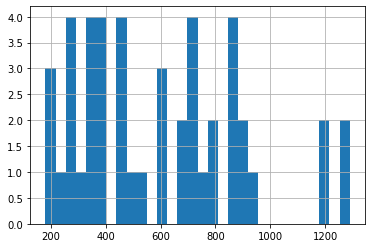

In [19]:
df[df.ville == 'Cachan'].prix.hist(bins=30)